# Programming for Data Science 2024

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from libraries such as scikit-learn or Keras, in other cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to tailor the algorithm to your problem. In that sense, learning to implement algorithms is an important part of your skillset.

This is an Individual assingment, students that are caught cheating will obtain a score of 0 points.<br>
The Homeworking Assignment Three is worth 10% of your final grade.

The submission package should correspond to a .zip archive (.rar files are not acceptable) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. HTML print of your Jupyter Notebook;
3. All files outputed as part of the exercises.

The .zip archive filename should be student1ID_student2ID.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries?)
3. Readibility of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according also for your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

Submission is done through the respective Moodle activity.
Deadline is November 2nd at 12:00. 
A penality of 1 point per day late will be applied to late deliveries, with a maximum of 5 days.

Please fill the following fields: <br> <br>
**Name**: Catarina Ferreira Gonçalves Nunes<br>
**ID**: 20230083<br>

<br> 

**Name**: Vinicius Lallo Costa Pinto
<br>
**ID** 20211682: <br>

## Clustering with K-Means

K-Means is one of the most popular "clustering" algorithms, which you perhaps are already familiar from the Data Mining curricular unit. K-means estimates the location of $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

The K-means Algorithm consists in an iterative process that is roughly as follows:
1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import numpy, Scipy, and pandas using, respectively, the aliases np, sc, and pd.

In [1]:
import numpy as np
import scipy as sc
import pandas as pd

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm into different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive dataset with similar properties to the real dataset that we will be working with.<br>

Such, test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation. This allows us to have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>
As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

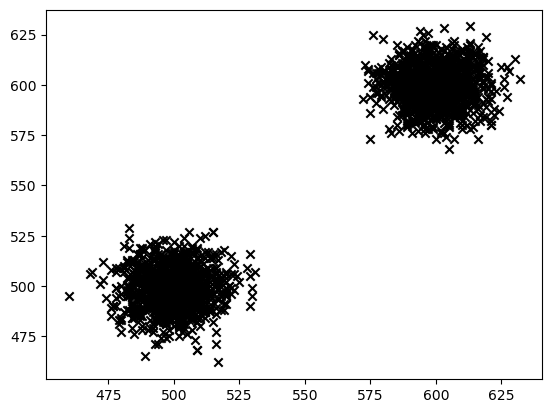

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

<b>Optional Challenge:</b> Can you write a function that generates an artificial dataset for testing purposes?<br>
We will award one extra point for students that offer a good implementation.

**Consider leaving this challenge to the very end of the assignment**

In [4]:
#To be consistent, we are going to use only numpy (and matplotlib for vizualization) in this optional challenge. 
#As research, we found this notebook: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/KMeans/KMeans.ipynb
#and, to create the data, in the output 16, they first define the clusters and them distribute the points, so as inspoiration,
#we will firts define the clusters (random in our case, to make it more fun :P) and them assign the points.

def generate_random_clusters(n_points, n_dimensions=2, min_clusters=2, max_clusters=6):
    ''' This funtion is buitl to generate an artificial dataset with a random number of clusters with the purpose of testing clusteting algorithms'''
    #As inputs:
    #n_points : total number number of data points
    # n_dim : the number of dimensions, in this case to to mantain a 2 dimensional ndarray (shape = (n_points, n_dim)
    #min_clusters : min n of clusters clusters is set at 2, as at least two clusters are necessary for effective clustering implementation.
    #max_clusters : We could actually not choose a max number of cluster,
    #but we want to prevent generating an excessive number of them for a clean implementation.
    
    #1: number of clusters
    n_clusters = np.random.randint(min_clusters, max_clusters + 1) # basically the number of clusters will be 
    #randomly choosen btw min_clusters & max_clusters (+1 to include)
    
    #2: random cluster centers
    cluster_centers = []
    
    # Generate random cluster centers with a minimum distance between them
    while len(cluster_centers) < n_clusters:
        # Propose a new cluster center - getting random centroids in a range of: 
        new_center = np.random.uniform(0, 500, n_dimensions) #we choose a similiar range to the first dataset
        
        # Check if the new center is at least 'min_distance' away from all existing centers
        if all(np.linalg.norm(new_center - center) >= 100 for center in cluster_centers):
            cluster_centers.append(new_center)
    
    cluster_centers = np.array(cluster_centers)  # Convert to np.array for easy handling later

    #3
    # Distribution of the points in the clusters
    points_per_cluster = n_points // n_clusters
    remainder = n_points % n_clusters  # Final adjustament with the remaining
    data = []
    
    #4
    for i, center in enumerate(cluster_centers):
        # This part generates a random standar deviation for each cluster, 
        #its important to refine this number as we make or interval of the cluster bigger or smaller (point #2). 
        #our maximum is 500 so we choose a bigger stv 
        #this basically ditates if the cluster will have the points more close to each other or more losse from each other 
        std_dev = np.random.uniform(1, 50)
        
        # thie distributes the remainer points from the point #3, if we have one 
        if i < remainder:
            cluster_points = points_per_cluster + 1
        else:
            cluster_points = points_per_cluster
        
        # This part generates the points around the center of the cluster with a random stdv
        points = np.random.normal(center, std_dev, (cluster_points, n_dimensions))
        data.append(points)
    
    # Combining in a single array
    X = np.vstack(data)
    np.random.shuffle(X) 
    
    return X

#Just a note, we tried to work ith the radius of the cluster but we liked the stv results better

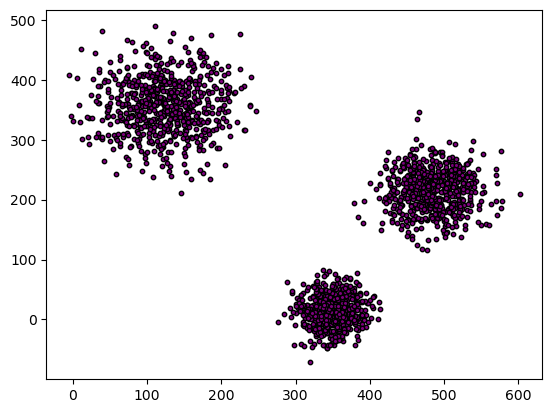

In [7]:
X = generate_random_clusters(n_points=2000)

plt.scatter(X[:, 0], X[:, 1], s=10, color="purple", marker="o", edgecolor="k")
plt.show()

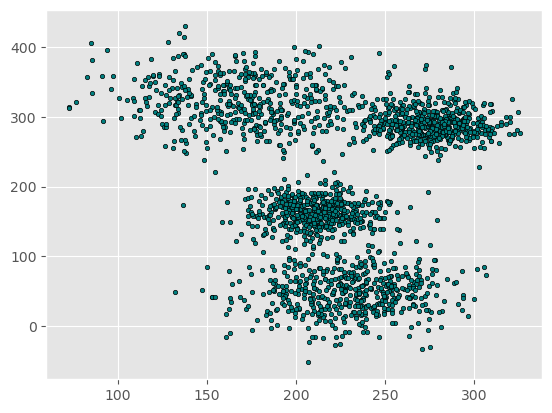

In [83]:
Y = generate_random_clusters(n_points=2000)

plt.scatter(Y[:, 0], Y[:, 1], s=10, color="teal", marker="o", edgecolor="k")
plt.show()

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point cannot picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and use data_test as the** $points$

In [9]:
#Sources:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
#https://stackoverflow.com/questions/14262654/numpy-get-random-set-of-rows-from-2d-array

def init(points, K):
    ''' 
    Step 2: Randomly choses K points from the data as initial locations of the centroids. Returns these as a (k x dimensions) ndarray.'''
    return points[np.random.choice(len(points), K, replace=False)] #replace=False - without replacement from points.

In [11]:
# calling the function with K = 2 using data_test as the points
K = 2
initial_centroids = init(data_test, K)
initial_centroids

array([[618, 614],
       [600, 592]], dtype=int64)

In [13]:
# Testing cell for type and shape of the return, and if it is from the input data 
n, d = data_test.shape

#1. Check the return type
assert type(initial_centroids) is np.ndarray, "The function should return a Numpy array instead of a {}".format(type(initial_centroids))

#2. Check the shape
assert initial_centroids.shape == (K, d), "Returned centers do not have the right shape ({} x {})".format(K, d)

#3. Check if each centroids is indeed from the input data
assert all(any(np.array_equal(center, row) for row in data_test) for center in initial_centroids), \
    "Each center must come from the input data."
print("\nPassed :)")


Passed :)


### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidean distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
Assume that $p1$ and $p2$ are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. <br>


**1) Test that your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task.**

Can you write a function that computes the euclidean distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**2) Show that your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

***1)***

In [15]:
#Source: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
#https://stackabuse.com/calculating-euclidean-distance-with-numpy/
def distance(p1, p2):
    dist = np.linalg.norm(p1 - p2) #or np.sqrt(np.sum((p1 - p2) ** 2)), but we choosed the former bc it is a optimized function in numpy.
    # as it calculates the Euclidean norm directly on the vector p1 - p2
    return dist

In [17]:
#Test variables, do not change the values
p1 = np.array([1,3])
p2 = np.array([7,2])

In [19]:
distance(p1,p2) 

6.082762530298219

***2)***

In [21]:
#Test variables, do not change the values
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

In [23]:
distance(p1,p2)

12.922847983320086

### Step 4

Write a function <b>centroid_update</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 
The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).
The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.
Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the number of clusters.

The function <b>centroid_update</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points and length K.

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [25]:
def centroid_update(points, clusters):
    m, d = points.shape #d is always the dimensions
    k = int(max(clusters)) + 1
    assert m == len(clusters)
    assert (min(clusters) >= 0)
    
    centers = np.empty((k, d))
    for i in range(k):
        # ,
        # i.e., centers[j, :d].
        centers[i,:] = np.mean(points[clusters==i, :], axis=0) #this computes the new center for cluster i
        
    return centers

In [27]:
# Tesst variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [29]:
cen = centroid_update(p, c)

In [31]:
cen

array([[0.44995487, 0.55986467],
       [0.53760985, 0.53912646],
       [0.8922063 , 0.26672425]])

### Step 5

Write a function <b>points_update</b> that takes two input arguments: $points$ and $centroids$.<br>
The function <b>points_update</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [33]:
def points_update(points, centroids):
    clusters = np.array([np.argmin([distance(p, centroid) for centroid in centroids]) for p in points]) #using list comprehensions
    # we use np.argmin to finding the index of the closest centroid for each point 
    return clusters

new_clusters = points_update(p, cen)

In [35]:
new_clusters

array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0], dtype=int64)

-------
The `points_update` function is designed to assign each point in our dataset to the nearest centroid based on the Euclidean distance. During this, the points in p were reassing to the nearest cluster in the variable cen calcuated previosly containing 3 clusters points.

basically we had:
c = array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

now we have array([2, 0, 0, 1, 2, 0, 1, 1, 0, 0] 

meaning, for example, that point 4, which was previously assigned to Cluster 1, is now assigned to Cluster 2. This change indicates that the point is closer to the centroid of Cluster 2 after the centroids were updated.


-------------------------

### Step 6

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>
The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidean distance between the old and new positions of each centroid. This will give us a quantity that tell us whether our algorithm is still converging to the solution or got to good approximation. We will use a tolerance threshold in the average change in the centroids positions to make this decision.

**Test your function then report the distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters.**

In [37]:
def error(oldcentroids, newcentroids): # Error here means how much the centroids moved compared to the last step
    return np.mean([distance(old, new) for old, new in zip(oldcentroids, newcentroids)]) #using list comprehensions (with zip) to iterate over the 
    #pair of old and new centroids, calculating the distance for each pair and then it calculate the mean of the squared errors of the list
#funcion distance is from step 3
print("Error between old and new centroids:", error(cen, centroid_update(p, new_clusters)))

Error between old and new centroids: 0.17635560837965428


### Step 7

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous Steps to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [39]:
#inspo source: https://stackoverflow.com/questions/63876217/show-that-the-k-means-algorithm-will-update-a-clustering-c-in-such-a-way-that-on

def kmeans(points, niter, tol, K=2):
    history = []  # Save each step's clusters, centroids, and error 
    t = 0  # Track how many times we’ve repeated the process

    # 1: Picking K random points to be our starting centroids 
    centroids = init(points, K) #- step 2 function, using the input data - points -
    #and the number of cluster K, in the next steps we will use a K=k to test several K to finf the optimal cluster
    
    for _ in range(niter):  # Loop up the max number of iterations ('niter') unless we stop early
     # 2: this assign each point to the closest centroid 
        # and creates clusters by grouping points that are closest to each centroid
        clusters = points_update(points, centroids) #- step 5 function
        
    # 3: NOw we update each centroid based on the average location of its cluster's points - moves the centroid to the "center" 
        # of the points in its cluster
        new_centroids = centroid_update(points, clusters) #- step 4 function
        
    # 4: using the function error toaulate the  average distance moved by centroids
        step_error = error(centroids, new_centroids)
        history.append((clusters, new_centroids, step_error))
        
    # 5: Checking if the error is less than our tolerance (tol) - If centroids moved very little, we consider the clusters 'stable' and stop 
        if step_error < tol:
            print(f"For K = {K}: Converged after {t+1} iterations with error {step_error:.6f}")
            return clusters, new_centroids  
        
        # If not converged, update centroids to the new values and go to the next iteration
        centroids = new_centroids
        t += 1  # Increase the iteration count

    # If we hit the max number of iterations, we need to find the clustering step with the lowest error from the track history
    lowest_error = sorted(history, key=lambda x: x[-1])[0]
    print(f"Reached max iterations ({niter}). Lowest error found: {lowest_error[2]:.6f}")
    
    return lowest_error[:2]

In [41]:
kmeans(data_test, 500, 0.00001)

For K = 2: Converged after 3 iterations with error 0.000000


(array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
 array([[599.49853372, 599.63538612],
        [499.65527344, 498.94433594]]))

#### <div class="alert-success">Basically to make sure we got enought iterations (a sufficient nitter) we print the: print(f"For K = {K}: Converged after {t+1} iterations with error {step_error:.6f}") and print(f"Reached max iterations ({niter}). Lowest error found: {lowest_error[2]:.6f}"). </div>

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

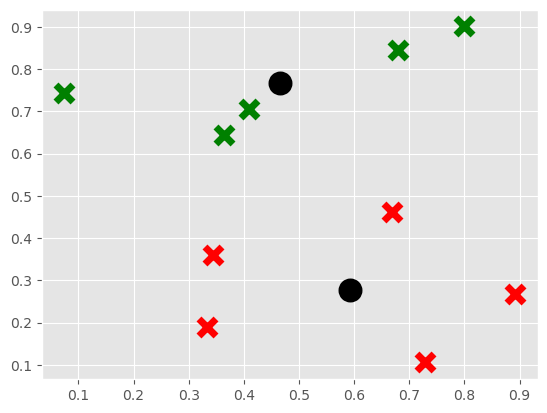

In [43]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

For K = 2: Converged after 2 iterations with error 0.000000


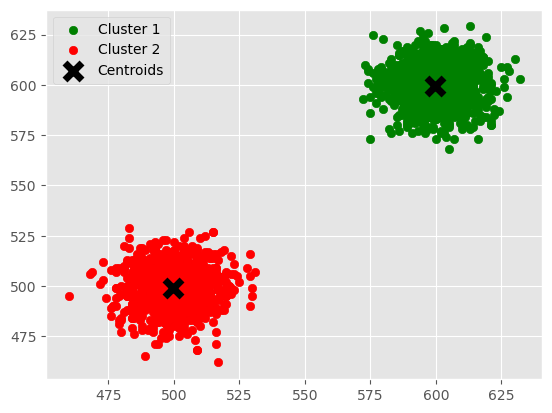

In [45]:
# K-means result with K=2 on data_test
clusters, centroids = kmeans(data_test, niter=500, tol=0.00001)
for i in range(2):
    plt.scatter(data_test[clusters == i][:, 0], data_test[clusters == i][:, 1], c=colors[i], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color='k', s=150, linewidths=5, label="Centroids")
plt.legend()
plt.show()

the 2 clusters are well defined

### Step 8

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is an 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared distance** of the points to the centroid of the cluster they are assigned.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the quantities that you computed above in the different steps**

In [47]:
def inertia(points, clusters, centroids):

     #Inertia is the average squared distance between each point and its assigned centroid. So:

    # Firts we get the distance between each data point and its assigned centroid
    squared_distances = [distance(points[i], centroids[clusters[i]]) ** 2 for i in range(len(points))] # then squares (**2) each distance value
    
    # and finallly get the mean of the squared distances
    return tuple([len(centroids), np.mean(squared_distances)]) #turning it into a tuple with the number of clusters and the inertia value.

In [49]:
inertia(p, c, cen)

(3, 0.10954209828084607)

### Step 9

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).

<img src="images/example_plot.png" alt="Alt text" width="700"/>

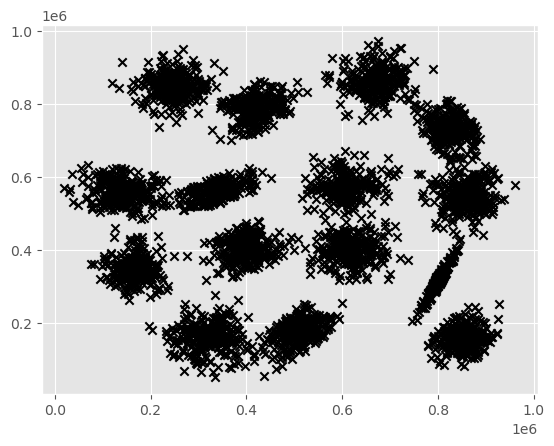

In [51]:
data_test2 = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()

plt.scatter(data_test2[:, 0], data_test2[:,1], color ='k', marker='x')

Per the plot it seems hat we have 15 defined clusters, but we will use the Elbow method.

Use the functions kmeans and internia to identify the most suitable number of clusters:

For K = 2: Converged after 9 iterations with error 0.000000
For K = 3: Converged after 18 iterations with error 0.000000
For K = 4: Converged after 10 iterations with error 0.000000
For K = 5: Converged after 12 iterations with error 0.000000
For K = 6: Converged after 21 iterations with error 0.000000
For K = 7: Converged after 15 iterations with error 0.000000
For K = 8: Converged after 12 iterations with error 0.000000
For K = 9: Converged after 23 iterations with error 0.000000
For K = 10: Converged after 16 iterations with error 0.000000
For K = 11: Converged after 12 iterations with error 0.000000
For K = 12: Converged after 38 iterations with error 0.000000
For K = 13: Converged after 12 iterations with error 0.000000
For K = 14: Converged after 23 iterations with error 0.000000
For K = 15: Converged after 22 iterations with error 0.000000
For K = 16: Converged after 12 iterations with error 0.000000
For K = 17: Converged after 17 iterations with error 0.000000
For K = 18: Conve

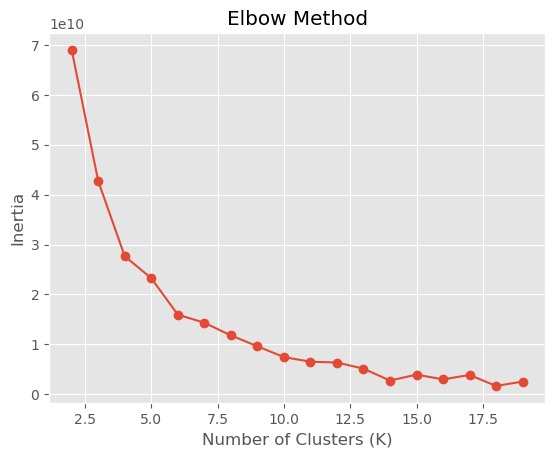

In [97]:
# Storing variables
inertia_values = []
clusters_centroids = []  # Store (clusters, centroids) for each K

# Run KMeans for each K from 2 to 19 - interval choosen by lokking ate the data plot
for k in range(2, 20):
    clusters, centroids = kmeans(data_test2, 500, 0.00001, k)
    inertia_values.append(inertia(data_test2, clusters, centroids)[1])
    clusters_centroids.append((clusters, centroids))  

# Elbow Method results with marker for optimal K
plt.plot(range(2, 20), inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

i here it seems that we have the optimal point  for K = 14 - the point in wich the inertia starts to decrease more slowly

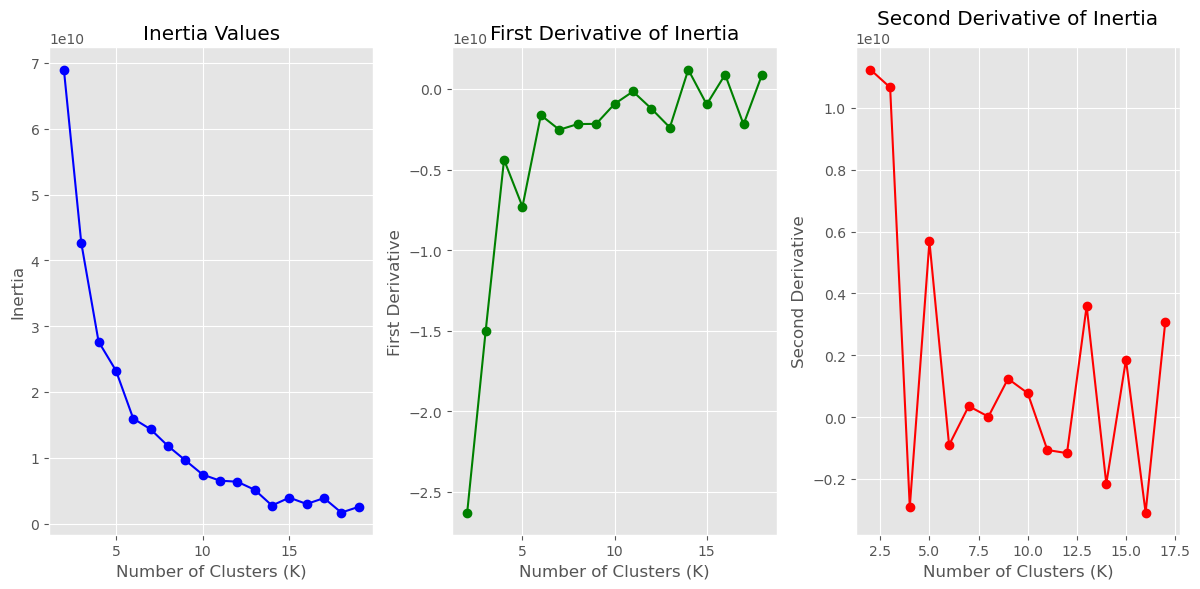

According to the second derivate, the optimal number of clusters using the Elbow Method is: 16


In [99]:
# Calculation of the first and second derivatives
first_derivative = np.diff(inertia_values, n=1)
second_derivative = np.diff(inertia_values, n=2)

# Define K values corresponding to each derivative
k_values = np.arange(2, 2 + len(inertia_values))  # K values from 2 to len(inertia_values)+1
k_values_first_derivative = k_values[:-1]  # Adjusting K values for the first derivative
k_values_second_derivative = k_values[:-2]  # Adjusting K values for the second derivative
optimal_k_elbow = np.argmin(second_derivative) + 2  # + 2 due to np.diff - explained bellow

# Plot original inertia values, first derivative, and second derivative
plt.figure(figsize=(12, 6))

# Plot inertia values
plt.subplot(1, 3, 1)
plt.plot(k_values, inertia_values, marker='o', color='b')
plt.title("Inertia Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")

# Plot first derivative
plt.subplot(1, 3, 2)
plt.plot(k_values_first_derivative, first_derivative, marker='o', color='g')
plt.title("First Derivative of Inertia")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("First Derivative")

# Plot second derivative
plt.subplot(1, 3, 3)
plt.plot(k_values_second_derivative, second_derivative, marker='o', color='r')
plt.title("Second Derivative of Inertia")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Second Derivative")

plt.tight_layout()
plt.show()

print(f"According to the second derivate, the optimal number of clusters using the Elbow Method is: {optimal_k_elbow}")

We will elaborate further below, but it's important to note that the second derivative method has its own flaws, so it should be paired with visual aids. Although the analysis suggests 16 clusters, we will choose to work with 14 clusters, as this appears to be a better fit. However, we previously identified that the data shows indications of 15 well-defined clusters.

For K = 14: Converged after 8 iterations with error 0.000000


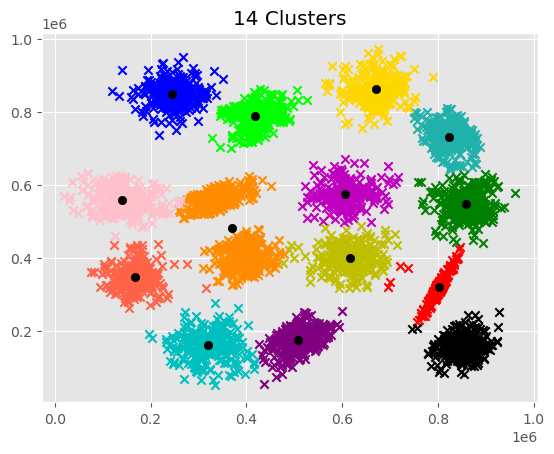

In [136]:
K = 14
colors = ["g", "r", "c", "b", "m", "y", "k", "tomato", "purple", "pink", "lime", "lightseagreen", "gold", "darkorange", "rosybrown"]

clusters, centroids = kmeans(data_test2, 500, 0.00001, K)

for i in range(len(clusters)):
    plt.scatter(data_test2[i,0],data_test2[i,1], marker="x", color=colors[clusters[i]])

for centroid_ in centroids:
    plt.scatter(centroid_[0],centroid_[1], marker="o", color="k")

plt.title(f"{K} Clusters")
plt.show()

## `Observations`:
### Understanding the Code for Finding the "Elbow" Point in Inertia Values

The "Elbow Point" is a common technique for determining the ideal number of clusters. We look for the point where inertia starts to decrease more slowly, creating an “elbow curve.” This point often indicates a good balance between model complexity (number of clusters) and variability (inertia) — the point where inertia begins to stabilize.bilizar.

We noticed that, the elbow method, and consequently the other methods we used just to compare, have sligth changes in the results - The issue comes from the fact that our custom kmeans function initializes centroids randomly each time it runs (the init function), which can lead to inconsistent results, especially when choosing K values for clustering - so it affects methods like the Elbow and Silhouette methods, as each run might yield slightly different clusters and, consequently, inertia or silhouette


We combine the visual insppection with the point where the second derivative is minimized.

The first derivative of the inertia values gives the rate of change. For an elbow point, we’re looking for where the rate of change begins to decrease more slowly. In clustering, this means that adding more clusters no longer yields substantial reductions in inertia.

The second derivative shows us the rate of change of the first derivative, which is the "curvature" of the plot.
A minimum in the second derivative represents a point where the curvature changes most — in other words, where the curve shifts from a steep drop to a more gradual slope, creating the “elbow.”

The following code calculates the second derivative of inertia values to identify the "elbow" point in the inertia plot:

```python
# Calculate the second derivative of inertia values to find the "elbow" point
second_derivative = np.diff(inertia_values, n=2) #is the same as doing: first_derivative = np.diff(inertia_values) and then second_derivative = np.diff(first_derivative)
optimal_k_elbow = np.argmin(second_derivative) + 2  # Offset by 2 due to np.diff 
```
- The `np.diff` function calculates the difference between consecutive elements of an array. When n=2 is specified, it computes the difference of the difference (calculates both the first and the second derivatives in a single call), calculating the second derivative of the inertia values. This operation helps identify changes in the curvature of the inertia plot.

- `np.argmin(second_derivative)`: This function returns the index of the smallest value in the second derivative array. Graphically, this corresponds to the point where the curvature of the inertia function changes significantly, indicating the "elbow".
- `+ 2`: is used bc the np.diff function reduces the size of the array by one for each call (in each difference we reduce one, because it does the difference between each consecutive pair of values - getting the intervals between the inertia values - technically we perfom 2 diferences with the n = 2 - ) - So we need to adjust the index returned to match the original values of K. If the inertia was calculated for K=2 to K=19, we add 2 to get the correct value of K.
  
The calculation of the second derivative is a technique used to determine where the rate of change of inertia stabilizes. This point indicates that adding more clusters (K) does not result in a significant improvement in clustering quality. This is the "elbow" you are looking for.

- sources: https://stats.stackexchange.com/questions/386777/identifying-k-means-clusters-number-programmaticaly & https://www.researchgate.net/figure/Figure-S4-Elbow-method-for-determining-the-clustering-number-for-each-round-Elbow_fig9_356198808 scores.

# Optional Challenge: Implementation
Getting the clusters for the artificial dataset

## Dataset X - more tight

For K = 2: Converged after 6 iterations with error 0.000000
For K = 3: Converged after 4 iterations with error 0.000000
For K = 4: Converged after 11 iterations with error 0.000000
For K = 5: Converged after 29 iterations with error 0.000000
For K = 6: Converged after 21 iterations with error 0.000000


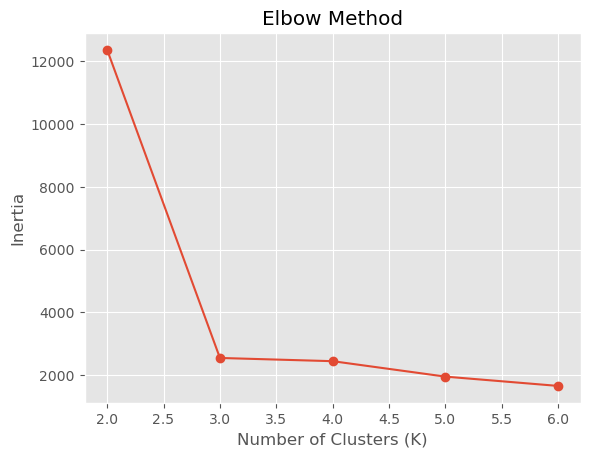

In [53]:
# Storing variables
inertia_values_X = []
clusters_centroids_X = []  # Store (clusters, centroids) for each K

# Run KMeans for each K from 2 to 7 - the function defined has a min of 2 and a max of 6
for k in range(2, 7):
    clusters_X, centroids_X = kmeans(X, 500, 0.00001, k)
    inertia_values_X.append(inertia(X, clusters_X, centroids_X)[1])
    clusters_centroids_X.append((clusters_X, centroids_X))  

# Elbow Method results with marker for optimal K
plt.plot(range(2, 7), inertia_values_X, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

For K = 3: Converged after 3 iterations with error 0.000000


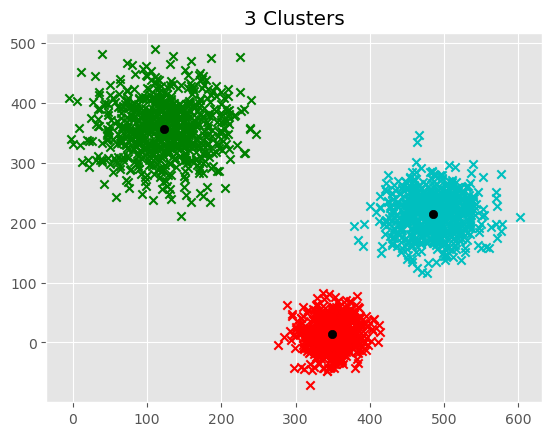

In [55]:
K = 3
clusters_X, centroids_X = kmeans(X, 500, 0.00001, K)

for i in range(len(clusters_X)):
    plt.scatter(X[i,0],X[i,1], marker="x", color=colors[clusters_X[i]])

for centroid_ in centroids_X:
    plt.scatter(centroid_[0],centroid_[1], marker="o", color="k")

plt.title(f"{K} Clusters")
plt.show()

## Dataset Y - more sparce

For K = 2: Converged after 6 iterations with error 0.000000
For K = 3: Converged after 4 iterations with error 0.000000
For K = 4: Converged after 9 iterations with error 0.000000
For K = 5: Converged after 38 iterations with error 0.000000
For K = 6: Converged after 35 iterations with error 0.000000


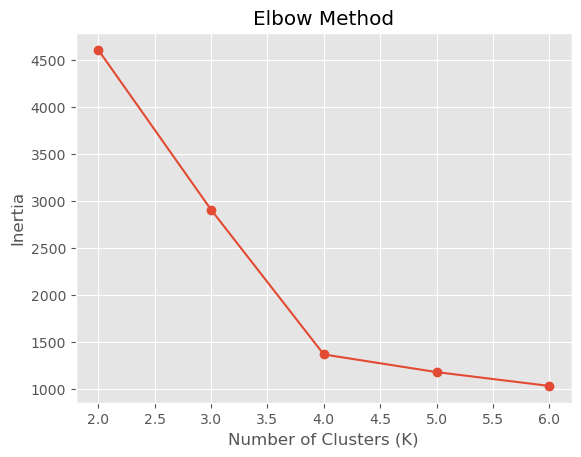

In [87]:
# Storing variables
inertia_values_Y = []
clusters_centroids_Y = []  # Store (clusters, centroids) for each K

# Run KMeans for each K from 2 to 7 - the function defined has a min of 2 and a max of 6
for k in range(2, 7):
    clusters_Y, centroids_Y = kmeans(Y, 500, 0.00001, k)
    inertia_values_Y.append(inertia(Y, clusters_Y, centroids_Y)[1])
    clusters_centroids_Y.append((clusters_Y, centroids_Y))  

# Elbow Method results with marker for optimal K
plt.plot(range(2, 7), inertia_values_Y, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

For K = 4: Converged after 9 iterations with error 0.000000


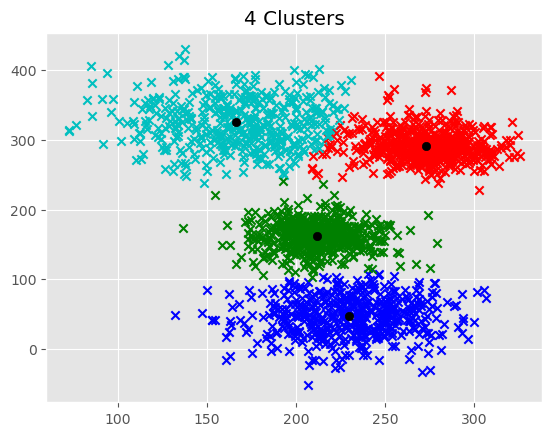

In [89]:
K = 4
clusters_Y, centroids_Y = kmeans(Y, 500, 0.00001, K)

for i in range(len(clusters_Y)):
    plt.scatter(Y[i,0],Y[i,1], marker="x", color=colors[clusters_Y[i]])

for centroid_ in centroids_Y:
    plt.scatter(centroid_[0],centroid_[1], marker="o", color="k")

plt.title(f"{K} Clusters")
plt.show()

`Lessons learned while computing the artificial data`: 
- Data Structure and Spread: If the clusters in the generated data are very close to each other or if there are outliers, the algorithm may have difficulty converging to clear cluster centers.
- the configurations for values, stv of the clusters and max number of cluster, worked well in the tested cases. 

# Conclusions from the hw and extra work: 
This part is not part of the homework, but we decided to leave since it was part of our research to reach a beteer understanding of the k-means clustering and how it works

### Clustering Optimization with Silhouette Score

In our analysis, we explored an alternative method to optimize the number of clusters using the **silhouette score**. Although this approach is not part of our homework, it provides a look at the differences between clustering methods. We utilized the `silhouette_score` function from the `sklearn` library to evaluate the quality of our clustering results.

#### Implementation

We calculated the silhouette scores for the clusters identified by the Elbow Method. The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

Here's the code snippet we used:

```python
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Silhouette Scores using the stored clusters from the Elbow Method
silhouette_scores = []
for clusters, _ in clusters_centroids:
    score = silhouette_score(data_test2, clusters)
    silhouette_scores.append(score)

# Identify the optimal K based on the maximum Silhouette Score
optimal_k_silhouette = range(2, 20)[silhouette_scores.index(max(silhouette_scores))]

plt.plot(range(2, 20), silhouette_scores, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.axvline(x=optimal_k_silhouette, color='red', linestyle='--', label=f"Optimal K: {optimal_k_silhouette}")
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters using the Silhouette Method is: {optimal_k_silhouette}")
```


### KMeans Functionality Testing

Additionally, we tested our function using the KMeans class from the sklearn library. We based this on a previous notebook code, and it clearly defined the number of clusters as 15. However, it's important to note that the initialization of centroids can lead to inconsistencies since we randomly place centroids each time we call the KMeans function.

Here's the relevant code:

## Testing KMeans with Sklearn

To evaluate the effectiveness of our clustering approach, we implemented the KMeans algorithm from the `sklearn` library. This allowed us to compare the results obtained using a well-established method against our custom KMeans implementation. This code is from a previous notebook.

### Findings from Sklearn KMeans

Upon testing, it became clear that the optimal number of clusters is well-defined at **15**. 

```python
range_n_clusters = range(4, 18)  
SEED = 42  


fig, axs = plt.subplots(len(range_n_clusters), 2, figsize=(10, len(range_n_clusters) * 5))

for row, n_clusters in enumerate(range_n_clusters):

    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=SEED)
    cluster_labels = clusterer.fit_predict(data_test2)  


    ax1 = axs[row, 0]
    ax1.set_xlim([-0.2, 0.9])
    ax1.margins(0.05)
    silhouette_avg = silhouette_score(data_test2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(data_test2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
    ax2 = axs[row, 1]
    ax2.set_title(f"Clustered data with k = {n_clusters}", fontsize=16)
    ax2.scatter(data_test2[:, 0], data_test2[:, 1], c=cluster_labels, cmap='tab20', marker='o', alpha=0.5)
    ax2.set_xlabel("Feature 1", fontsize=14)
    ax2.set_ylabel("Feature 2", fontsize=14)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.grid(False)

plt.tight_layout()
plt.savefig("silhouette_diagram.png", dpi=650, transparent=False)
plt.show()
```
The comparison between the sklearn KMeans results and our custom implementation shows the importance of understanding the impact of centroid initialization on clustering outcomes. Althought our custom implementation allows for deeper understanding into the algorithm’s mechanics and the challenges posed by random initialization, it can sometimes be less reliable and efficient comparing to the sklearn KMeans clustering.

# Final conclusions

In our custom KMeans function, we initialize the centroids randomly each time using the init function. This can introduce variability in the clustering outcomes due to the following reasons:

- Random Centroid Selection: Each time the custom KMeans function is executed, the initial centroids are chosen randomly from the dataset. This randomness can affect the convergence behavior and the final clusters produced.
- Potential for Suboptimal Clusters: Depending on the initial placement of the centroids, the algorithm may converge to a local minimum, resulting in suboptimal clusters that do not accurately represent the underlying data distribution.
- Inconsistencies Across Runs: Different runs of the custom KMeans algorithm can have different clustering results, complicating validation and interpretation of the clustering performance.